In [ ]:
#Question1

In [3]:
pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 52.9 MB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/3.6.2/libexec/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

In [5]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, sep='|')


In [6]:
mean_age_by_occupation = users.groupby('occupation')['age'].mean()
print(mean_age_by_occupation)


occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [7]:
users['gender'] = users['gender'].map({'M': 1, 'F': 0})

male_ratio_by_occupation = users.groupby('occupation')['gender'].mean()

male_ratio_by_occupation.sort_values(ascending=False, inplace=True)

print(male_ratio_by_occupation)


occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64


In [8]:
min_age_by_occupation = users.groupby('occupation')['age'].min()
max_age_by_occupation = users.groupby('occupation')['age'].max()

min_max_age_by_occupation = pd.merge(min_age_by_occupation, max_age_by_occupation, on='occupation')

print(min_max_age_by_occupation)


               age_x  age_y
occupation                 
administrator     21     70
artist            19     48
doctor            28     64
educator          23     63
engineer          22     70
entertainment     15     50
executive         22     69
healthcare        22     62
homemaker         20     50
lawyer            21     53
librarian         23     69
marketing         24     55
none              11     55
other             13     64
programmer        20     63
retired           51     73
salesman          18     66
scientist         23     55
student            7     42
technician        21     55
writer            18     60


In [9]:
mean_age_by_occ_gender = users.groupby(['occupation', 'gender'])['age'].mean()

print(mean_age_by_occ_gender)


occupation     gender
administrator  0         40.638889
               1         37.162791
artist         0         30.307692
               1         32.333333
doctor         1         43.571429
educator       0         39.115385
               1         43.101449
engineer       0         29.500000
               1         36.600000
entertainment  0         31.000000
               1         29.000000
executive      0         44.000000
               1         38.172414
healthcare     0         39.818182
               1         45.400000
homemaker      0         34.166667
               1         23.000000
lawyer         0         39.500000
               1         36.200000
librarian      0         40.000000
               1         40.000000
marketing      0         37.200000
               1         37.875000
none           0         36.500000
               1         18.600000
other          0         35.472222
               1         34.028986
programmer     0         32.16666

In [10]:
count_gender_by_occupation = users.groupby(['occupation', 'gender'])['gender'].count()

count_total_by_occupation = users.groupby('occupation')['gender'].count()

percentage_by_occupation = (count_gender_by_occupation / count_total_by_occupation) * 100

percentage_by_occupation = percentage_by_occupation.unstack()

print(percentage_by_occupation)


gender                 0           1
occupation                          
administrator  45.569620   54.430380
artist         46.428571   53.571429
doctor               NaN  100.000000
educator       27.368421   72.631579
engineer        2.985075   97.014925
entertainment  11.111111   88.888889
executive       9.375000   90.625000
healthcare     68.750000   31.250000
homemaker      85.714286   14.285714
lawyer         16.666667   83.333333
librarian      56.862745   43.137255
marketing      38.461538   61.538462
none           44.444444   55.555556
other          34.285714   65.714286
programmer      9.090909   90.909091
retired         7.142857   92.857143
salesman       25.000000   75.000000
scientist       9.677419   90.322581
student        30.612245   69.387755
technician      3.703704   96.296296
writer         42.222222   57.777778


In [ ]:
#Question2

In [11]:
import pandas as pd


In [21]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url)

In [22]:
goals = euro12['Goals']
print(goals)


0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [23]:
num_teams = euro12['Team'].count()
print(num_teams)


16


In [24]:
num_columns = euro12.shape[1]
print(num_columns)


35


In [25]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)


                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [26]:
discipline_sorted = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=[False, False])
print(discipline_sorted)


                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0


In [27]:
mean_yellow_cards = discipline['Yellow Cards'].mean()
print(mean_yellow_cards)


7.4375


In [28]:
high_scoring_teams = euro12[euro12['Goals'] > 6]
print(high_scoring_teams)


       Team  Goals  Shots on target  Shots off target Shooting Accuracy   
5   Germany     10               32                32             47.8%  \
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals   
5             15.6%                          80             2              1  \
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won   
5                      0  ...          10                 62.6%         63  \
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off   
5              49        12             4          0       15        15  \
13             83        19            11          0       17        17   

    Players Used  
5             17  
13            18  

[2 rows x 35 c

In [29]:
g_teams = euro12[euro12['Team'].str.startswith('G')]
print(g_teams)


      Team  Goals  Shots on target  Shots off target Shooting Accuracy   
5  Germany     10               32                32             47.8%  \
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals   
5            15.6%                          80             2              1  \
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won   
5                     0  ...          10                 62.6%         63  \
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off   
5             49        12             4          0       15        15  \
6             48        12             9          1       12        12   

   Players Used  
5            17  
6            20  

[2 rows x 35 columns]


In [30]:
first_7_columns = euro12.iloc[:, :7]
print(first_7_columns)


                   Team  Goals  Shots on target  Shots off target   
0               Croatia      4               13                12  \
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [31]:
all_except_last_3_columns = euro12.iloc[:, :-3]
print(all_except_last_3_columns)


                   Team  Goals  Shots on target  Shots off target   
0               Croatia      4               13                12  \
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [32]:
shooting_accuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
print(shooting_accuracy)


       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


In [ ]:
#Question3

In [33]:
import pandas as pd
import numpy as np


In [34]:
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))


In [35]:
df = pd.concat([series1, series2, series3], axis=1)


In [36]:
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']


In [37]:
bigcolumn = pd.concat([series1, series2, series3], axis=0)
bigcolumn = bigcolumn.to_frame()


In [38]:
print(bigcolumn.index)


Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       ...
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype='int64', length=300)


In [39]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn.index = range(len(bigcolumn))


In [ ]:
#Question5

In [48]:
import pandas as pd
import numpy as np



In [49]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')


In [50]:
chipo = pd.read_csv(url, sep='\t')


In [51]:
chipo.head(10)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [52]:
len(chipo)


4622

In [54]:
len(chipo.columns)


5

In [55]:
chipo.columns


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [56]:
chipo.index


RangeIndex(start=0, stop=4622, step=1)

In [57]:
chipo.groupby('item_name').sum().sort_values('quantity', ascending=False).head(1)


,order_id,quantity,choice_description,item_price
item_name,,,,
Chicken Bowl,713926,761,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 ...


In [58]:
chipo.groupby('item_name').sum().sort_values('quantity', ascending=False).head(1)['quantity']


item_name
Chicken Bowl    761
Name: quantity, dtype: int64

In [59]:
chipo.groupby('choice_description').sum().sort_values('quantity', ascending=False).head(1)


,order_id,quantity,item_name,item_price
choice_description,,,,
[Diet Coke],123455,159,Canned SodaCanned SodaCanned Soda6 Pack Soft D...,$2.18 $1.09 $1.09 $6.49 $2.18 $1.25 $1.09 $6.4...


In [60]:
chipo['quantity'].sum()


4972

In [61]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo['item_price'].dtype


dtype('float64')

In [62]:
revenue = (chipo['quantity'] * chipo['item_price']).sum()
round(revenue, 2)


39237.02

In [63]:
chipo['order_id'].nunique()


1834

In [64]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
round(chipo.groupby('order_id')['revenue'].sum().mean(), 2)


21.39

In [65]:
num_items_sold = len(chipo['item_name'].unique())
print("Number of different items sold:", num_items_sold)


Number of different items sold: 50


In [ ]:
#Question 6

In [6]:
pip install matplotlib pandas


  Using cached matplotlib-3.7.1-cp311-cp311-macosx_11_0_arm64.whl (7.3 MB)
  Using cached contourpy-1.0.7-cp311-cp311-macosx_11_0_arm64.whl (229 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.39.3-py3-none-any.whl (1.0 MB)
  Using cached kiwisolver-1.4.4-cp311-cp311-macosx_11_0_arm64.whl (63 kB)
  Using cached Pillow-9.5.0-cp311-cp311-macosx_11_0_arm64.whl (3.1 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
Note: you may need to restart the kernel to use updated packages.


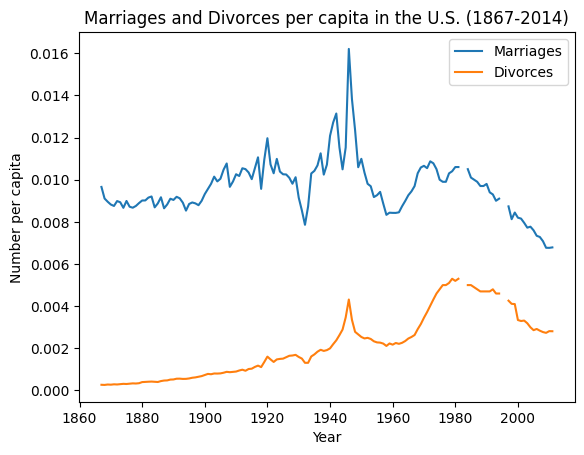

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('us-marriages-divorces-1867-2014.csv')


data['Marriages_per_capita'] = data['Marriages'] / data['Population']
data['Divorces_per_capita'] = data['Divorces'] / data['Population']


plt.plot(data['Year'], data['Marriages_per_capita'], label='Marriages')
plt.plot(data['Year'], data['Divorces_per_capita'], label='Divorces')


plt.xlabel('Year')
plt.ylabel('Number per capita')
plt.title('Marriages and Divorces per capita in the U.S. (1867-2014)')


plt.legend()


plt.show()


In [ ]:
#Question7

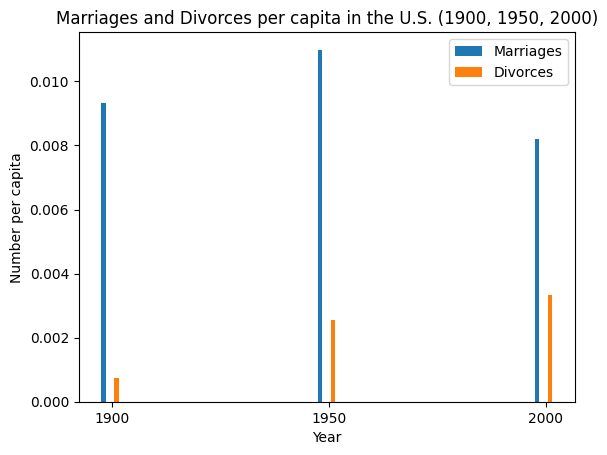

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('us-marriages-divorces-1867-2014.csv')


years = [1900, 1950, 2000]
data_selected = data[data['Year'].isin(years)].copy()


data_selected.loc[:, 'Marriages_per_capita'] = data_selected['Marriages'] / data_selected['Population']
data_selected.loc[:, 'Divorces_per_capita'] = data_selected['Divorces'] / data_selected['Population']


plt.bar(data_selected['Year']-2, data_selected['Marriages_per_capita'], width=1, label='Marriages')
plt.bar(data_selected['Year']+1, data_selected['Divorces_per_capita'], width=1, label='Divorces')


plt.xlabel('Year')
plt.ylabel('Number per capita')
plt.title('Marriages and Divorces per capita in the U.S. (1900, 1950, 2000)')


plt.xticks(years, years)


plt.legend()


plt.show()



In [ ]:
#Question8

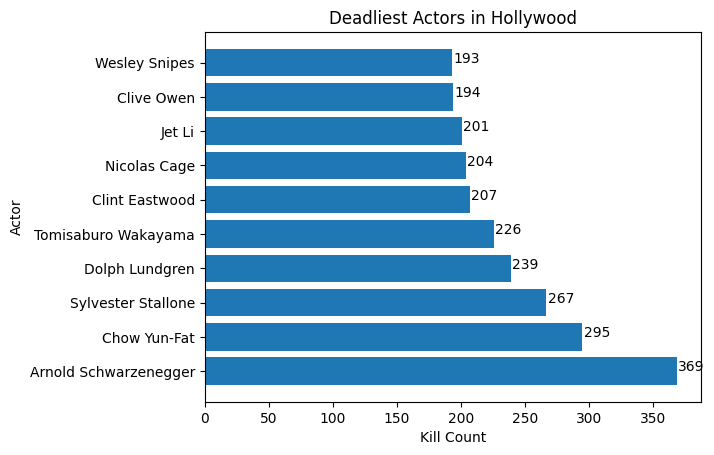

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('actor_kill_counts.csv')


data_sorted = data.sort_values(by='Count', ascending=False)


plt.barh(data_sorted['Actor'], data_sorted['Count'])


plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')


for i, count in enumerate(data_sorted['Count']):
    plt.text(count + 1, i, str(count))


plt.show()


In [ ]:
#Question9

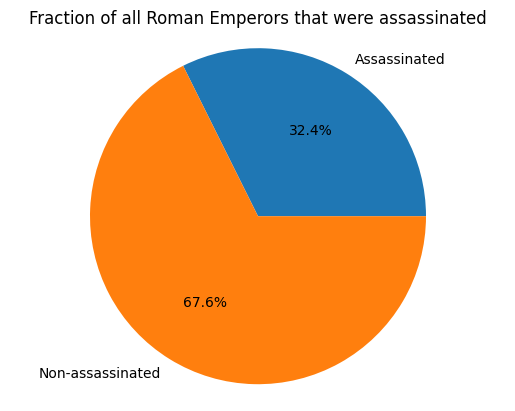

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('roman-emperor-reigns.csv')


assassinations = (data['Cause_of_Death'] == 'Assassinated').sum()
non_assassinations = len(data) - assassinations


assassination_pct = assassinations / len(data) * 100
non_assassination_pct = non_assassinations / len(data) * 100


plt.pie([assassinations, non_assassinations], labels=['Assassinated', 'Non-assassinated'], autopct='%1.1f%%')


plt.title('Fraction of all Roman Emperors that were assassinated')


plt.axis('equal')


plt.show()


In [ ]:
#Question10

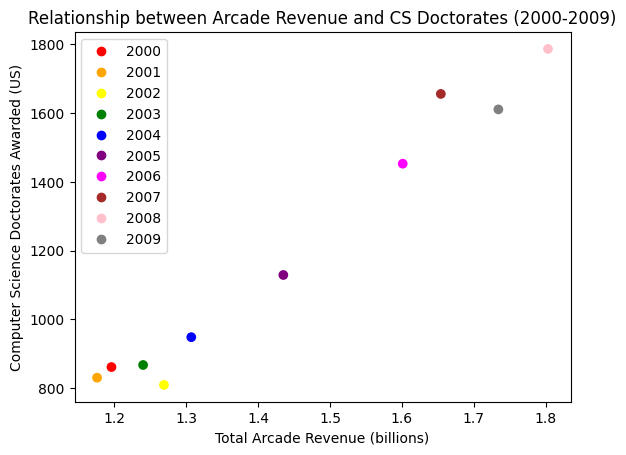

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')


colors = {'2000': 'red', '2001': 'orange', '2002': 'yellow', '2003': 'green', '2004': 'blue', '2005': 'purple', '2006': 'magenta', '2007': 'brown', '2008': 'pink', '2009': 'gray'}


plt.scatter(data['Total Arcade Revenue (billions)'], data['Computer Science Doctorates Awarded (US)'], c=data['Year'].apply(lambda x: colors[str(x)]))


plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Arcade Revenue and CS Doctorates (2000-2009)')


handles = [plt.plot([],[], marker="o", ls="", color=color, label=year)[0] for year, color in colors.items()]
plt.legend(handles=handles)


plt.show()




In [ ]:
#Question 4

In [36]:
import pandas as pd
import numpy as np


In [47]:
data = pd.read_csv('wind.txt', delimiter = "\s+", na_values = 'NaN')

In [38]:
data = data.set_index('year_month_day')


In [46]:
def fix_year(x):
    if x.year > 2000:
        year = int(x.year - 100)
    else:
        year = int(x.year)
    return pd.Timestamp(year=year, month=x.month, day=x.day)




In [48]:
data = pd.read_csv('wind.txt', sep='\s+', parse_dates={'date': [0, 1, 2]}, date_format='%y%m%d')

In [49]:
data = data.rename(columns={'date': 'Yr_Mo_Dy'})

In [50]:
data['Yr_Mo_Dy'] = pd.to_datetime(data['Yr_Mo_Dy'], format='%y %m %d')

In [51]:
missing_values = data.isna().sum()